In [11]:
from google.colab import drive
drive.mount ('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
test_data = pd.read_csv("/test.csv")
train_data = pd.read_csv("/train.csv")

Train dataset:
          id  vendor_id   pickup_datetime  dropoff_datetime  passenger_count  \
0  id2875421          2  14-03-2016 17:24  14-03-2016 17:32                1   
1  id2377394          1  12-06-2016 00:43  12-06-2016 00:54                1   
2  id3858529          2  19-01-2016 11:35  19-01-2016 12:10                1   
3  id3504673          2  06-04-2016 19:32  06-04-2016 19:39                1   
4  id2181028          2  26-03-2016 13:30  26-03-2016 13:38                1   

   pickup_longitude  pickup_latitude  dropoff_longitude  dropoff_latitude  \
0        -73.982155        40.767937         -73.964630         40.765602   
1        -73.980415        40.738564         -73.999481         40.731152   
2        -73.979027        40.763939         -74.005333         40.710087   
3        -74.010040        40.719971         -74.012268         40.706718   
4        -73.973053        40.793209         -73.972923         40.782520   

  store_and_fwd_flag  trip_duration  
0  

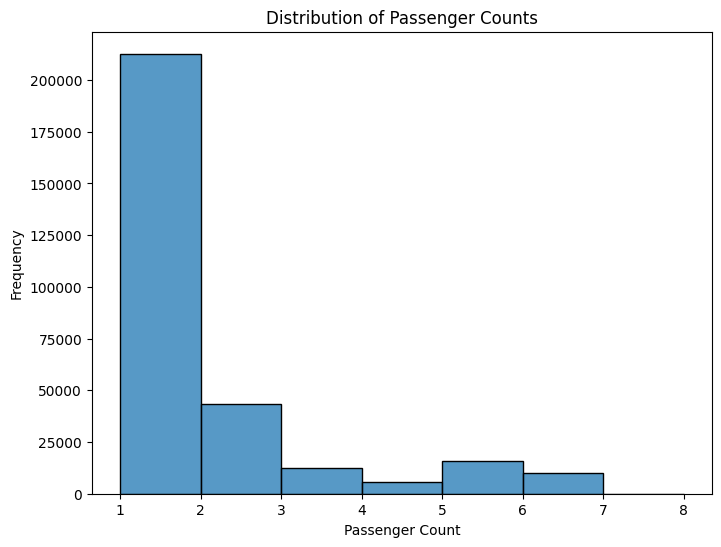


Missing values in the train dataset:
id                    0
vendor_id             0
pickup_datetime       0
dropoff_datetime      0
passenger_count       0
pickup_longitude      0
pickup_latitude       1
dropoff_longitude     1
dropoff_latitude      1
store_and_fwd_flag    1
trip_duration         1
dtype: int64

Missing values in the test dataset:
id                    0
vendor_id             0
pickup_datetime       0
passenger_count       1
pickup_longitude      1
pickup_latitude       1
dropoff_longitude     1
dropoff_latitude      1
store_and_fwd_flag    1
dtype: int64


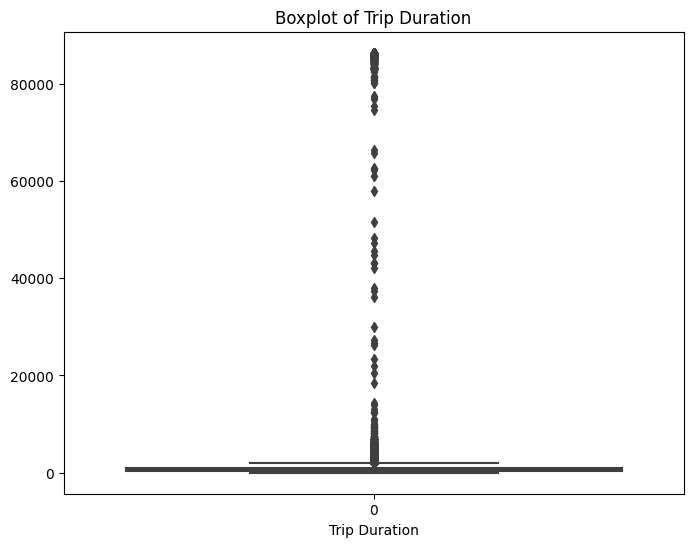

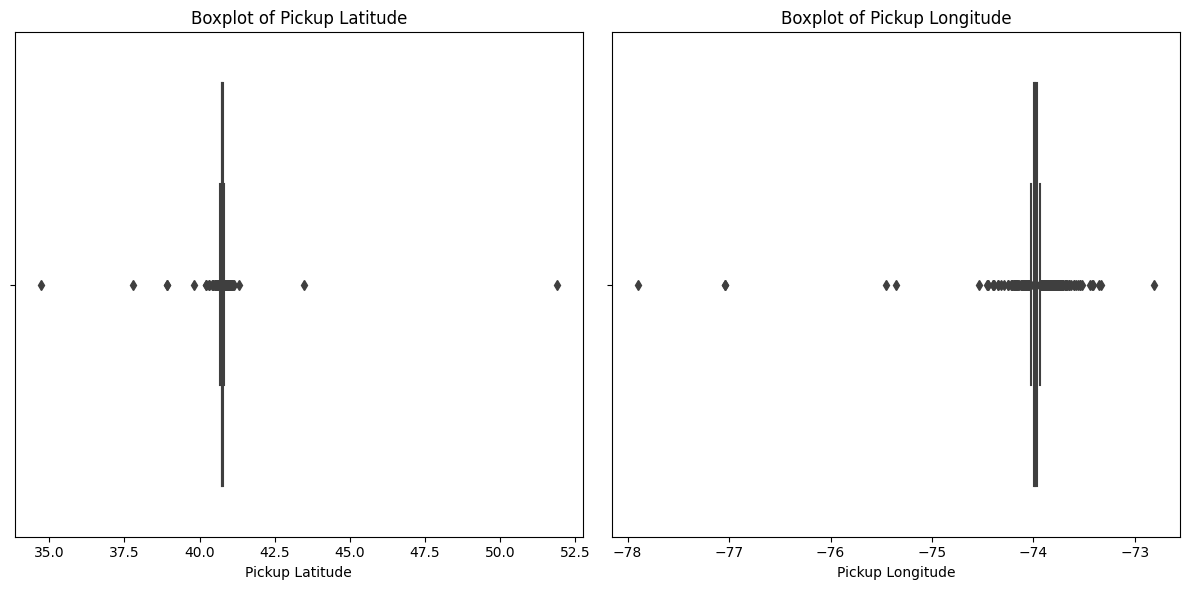

In [4]:
#DATA EXPLORATION
print("Train dataset:")
print(train_data.head())

# Display the first few rows of the test dataset
print("\nTest dataset:")
print(test_data.head())

# Summary statistics of the train dataset
print("\nSummary statistics of the train dataset:")
print(train_data.describe())

# Summary statistics of the test dataset
print("\nSummary statistics of the test dataset:")
print(test_data.describe())

# Distribution of passenger counts
plt.figure(figsize=(8, 6))
sns.histplot(train_data["passenger_count"], bins=range(1, 9), kde=False)
plt.xlabel("Passenger Count")
plt.ylabel("Frequency")
plt.title("Distribution of Passenger Counts")
plt.show()

# Missing values in the train dataset
print("\nMissing values in the train dataset:")
print(train_data.isnull().sum())

# Missing values in the test dataset
print("\nMissing values in the test dataset:")
print(test_data.isnull().sum())

# Outlier detection for trip duration
plt.figure(figsize=(8, 6))
sns.boxplot(train_data["trip_duration"])
plt.xlabel("Trip Duration")
plt.title("Boxplot of Trip Duration")
plt.show()

# Outlier detection for latitude and longitude coordinates
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=train_data["pickup_latitude"])
plt.xlabel("Pickup Latitude")
plt.title("Boxplot of Pickup Latitude")
plt.subplot(1, 2, 2)
sns.boxplot(x=train_data["pickup_longitude"])
plt.xlabel("Pickup Longitude")
plt.title("Boxplot of Pickup Longitude")
plt.tight_layout()
plt.show()

In [37]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the train and test datasets
train_data = pd.read_csv("/train.csv")
test_data = pd.read_csv("/test.csv")

# Preprocess the data (handling missing values, scaling, encoding) - Use your own data preprocessing code here

# Convert 'pickup_datetime' to pandas datetime objects
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])

# Extract features from 'pickup_datetime'
train_data['pickup_hour'] = train_data['pickup_datetime'].dt.hour
train_data['pickup_dayofweek'] = train_data['pickup_datetime'].dt.dayofweek

test_data['pickup_hour'] = test_data['pickup_datetime'].dt.hour
test_data['pickup_dayofweek'] = test_data['pickup_datetime'].dt.dayofweek

# Drop unnecessary columns and encode 'store_and_fwd_flag'
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

# Split the train data into features and target variable
train_features = train_data.drop(['trip_duration', 'id', 'pickup_datetime', 'dropoff_datetime'], axis=1)
train_target = train_data['trip_duration']

# Train the XGBoost Regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(train_features, train_target)

# Make predictions on the test set
test_predictions = xgb_model.predict(test_data.drop(['id', 'pickup_datetime'], axis=1))

# Prepare the predictions for submission
submission = pd.DataFrame({'id': test_data['id'], 'trip_duration': test_predictions})

# Save the predictions to a CSV file
submission.to_csv('predictions.csv', index=False)

# Print the predicted total ride duration for each ride in the test dataset
for idx, row in submission.iterrows():
    print(f"Ride ID: {row['id']}, Predicted Trip Duration: {row['trip_duration']:.2f} seconds")


Streaming output truncated to the last 5000 lines.
Ride ID: id3126847, Predicted Trip Duration: 386.39 seconds
Ride ID: id1945675, Predicted Trip Duration: 1187.82 seconds
Ride ID: id3993406, Predicted Trip Duration: 1121.60 seconds
Ride ID: id1219469, Predicted Trip Duration: 902.72 seconds
Ride ID: id2809365, Predicted Trip Duration: 511.81 seconds
Ride ID: id3794995, Predicted Trip Duration: 772.93 seconds
Ride ID: id2961917, Predicted Trip Duration: 396.95 seconds
Ride ID: id3530304, Predicted Trip Duration: 574.04 seconds
Ride ID: id2090491, Predicted Trip Duration: 509.78 seconds
Ride ID: id1129724, Predicted Trip Duration: 872.76 seconds
Ride ID: id1612666, Predicted Trip Duration: 1967.29 seconds
Ride ID: id2725492, Predicted Trip Duration: 2313.97 seconds
Ride ID: id1301170, Predicted Trip Duration: 589.99 seconds
Ride ID: id3465318, Predicted Trip Duration: 621.08 seconds
Ride ID: id1139980, Predicted Trip Duration: 851.81 seconds
Ride ID: id3005066, Predicted Trip Duration: 

In [36]:
import pandas as pd
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt

# Load the train and test datasets
train_data = pd.read_csv("/train.csv")
test_data = pd.read_csv("/test.csv")

# Preprocess the data (handling missing values, scaling, encoding) - Use your own data preprocessing code here

# Convert 'pickup_datetime' to pandas datetime objects
train_data['pickup_datetime'] = pd.to_datetime(train_data['pickup_datetime'])
test_data['pickup_datetime'] = pd.to_datetime(test_data['pickup_datetime'])

# Extract features from 'pickup_datetime'
train_data['pickup_hour'] = train_data['pickup_datetime'].dt.hour
train_data['pickup_dayofweek'] = train_data['pickup_datetime'].dt.dayofweek

test_data['pickup_hour'] = test_data['pickup_datetime'].dt.hour
test_data['pickup_dayofweek'] = test_data['pickup_datetime'].dt.dayofweek

# Drop unnecessary columns and encode 'store_and_fwd_flag'
train_data['store_and_fwd_flag'] = train_data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})
test_data['store_and_fwd_flag'] = test_data['store_and_fwd_flag'].map({'N': 0, 'Y': 1})

# Split the train data into features and target variable
train_features = train_data.drop(['trip_duration', 'id', 'pickup_datetime', 'dropoff_datetime'], axis=1)
train_target = train_data['trip_duration']

# Split the train data into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(train_features, train_target, test_size=0.2, random_state=42)

# Train the XGBoost Regression model
xgb_model = xgb.XGBRegressor(n_estimators=100, random_state=42)
xgb_model.fit(X_train, y_train)

# Make predictions on the validation set
val_predictions = xgb_model.predict(X_val)

# Evaluate the model's performance on the validation set
rmse = sqrt(mean_squared_error(y_val, val_predictions))
print("Root Mean Squared Error (RMSE) on validation set:", rmse)

# Make predictions on the test set
test_predictions = xgb_model.predict(test_data.drop(['id', 'pickup_datetime'], axis=1))

# Prepare the predictions for submission
submission = pd.DataFrame({'id': test_data['id'], 'trip_duration': test_predictions})

# Save the predictions to a CSV file
submission.to_csv('predictions.csv', index=False)


Root Mean Squared Error (RMSE) on validation set: 3445.2687262230543


In [ ]:
n this code, we load the train and test datasets, preprocess the data (you should use your own data preprocessing code), and extract features from the 'pickup_datetime' column (pickup hour and day of the week). We then drop unnecessary columns and encode the 'store_and_fwd_flag' feature.

Next, we split the train data into features and target variable. Then, we further split the train data into training and validation sets using the train_test_split function from scikit-learn.

We then train the XGBoost regression model using the training data and make predictions on the validation set. We evaluate the model's performance using RMSE (Root Mean Squared Error) on the validation set.

Finally, we make predictions on the test set using the trained model and save the predictions to a CSV file for submission.

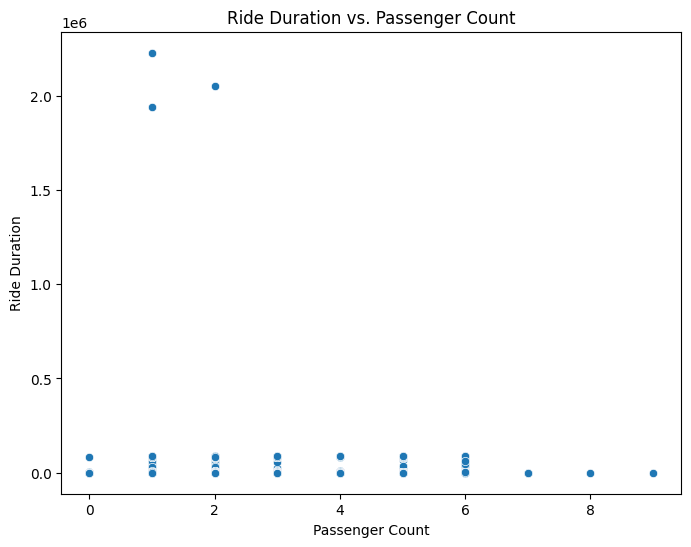

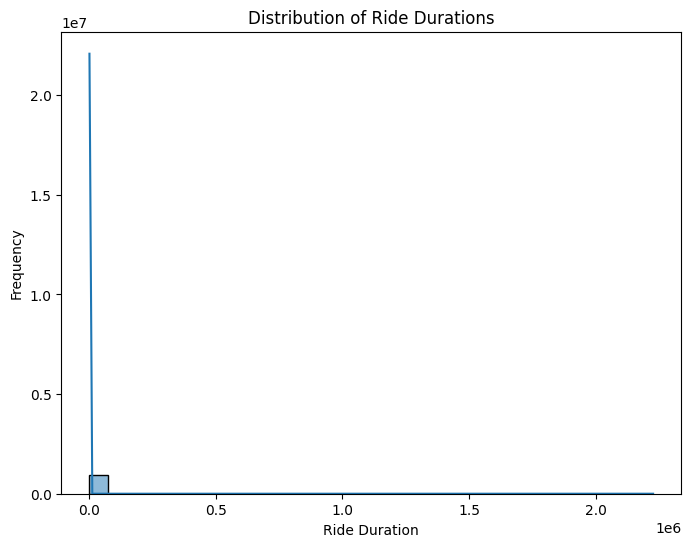

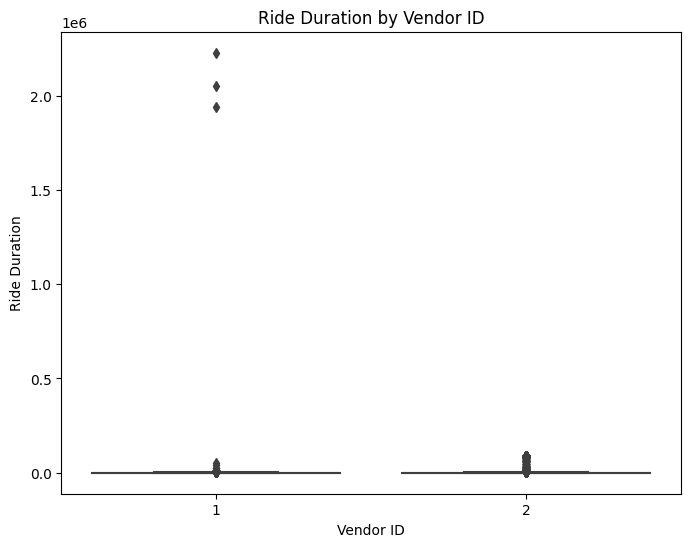

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the train dataset
train_data = pd.read_csv("/train.csv")

# Scatterplot: Ride Duration vs. Passenger Count
plt.figure(figsize=(8, 6))
sns.scatterplot(x=train_data["passenger_count"], y=train_data["trip_duration"])
plt.xlabel("Passenger Count")
plt.ylabel("Ride Duration")
plt.title("Ride Duration vs. Passenger Count")
plt.show()

# Histogram: Distribution of Ride Durations
plt.figure(figsize=(8, 6))
sns.histplot(train_data["trip_duration"], bins=30, kde=True)
plt.xlabel("Ride Duration")
plt.ylabel("Frequency")
plt.title("Distribution of Ride Durations")
plt.show()

# Boxplot: Ride Duration by Vendor ID
plt.figure(figsize=(8, 6))
sns.boxplot(x=train_data["vendor_id"], y=train_data["trip_duration"])
plt.xlabel("Vendor ID")
plt.ylabel("Ride Duration")
plt.title("Ride Duration by Vendor ID")
plt.show()
